In [2]:
import os
import pandas as pd
import numpy as np
# Carpeta que contiene las subcarpetas con los outputs
OUTPUT_FOLDER = "../sorted_outputs/"

# Lista para almacenar los datos
data = []
my_dict = {}
mx = 'mx'
mr = 'mr'
# Recorre todas las carpetas en OUTPUT_FOLDER
for folder_name in os.listdir(OUTPUT_FOLDER):
    folder_path = os.path.join(OUTPUT_FOLDER, folder_name)
    
    # Solo procesa si es una carpeta con el formato esperado
    if os.path.isdir(folder_path) and folder_name.startswith("a_") and "_b_" in folder_name:
        try:
            # Extrae los valores de a y b del nombre de la carpeta
            a_value = float(folder_name.split("_")[1])
            b_value = float(folder_name.split("_")[3])
            # Initialize the a_value key if it doesn't exist
            if f'{a_value:.2f}' not in my_dict:
                my_dict[f'{a_value:.2f}'] = {}
    
            # Initialize the b_value key in the nested dictionary if it doesn't exist
            if f'{b_value:.2f}' not in my_dict[f'{a_value:.2f}']:
                my_dict[f'{a_value:.2f}'][f'{b_value:.2f}'] = []
        except (IndexError, ValueError) as e:
            print(f"Error al extraer valores de a y b de {folder_name}: {e}")
            continue
        
        
        # Recorre los archivos dentro de la carpeta específica
        for file_name in os.listdir(folder_path):
            if file_name.startswith("output_") and file_name.endswith(".csv"):
                file_path = os.path.join(folder_path, file_name)
                try:
                    # Cargar el archivo CSV (puedes ajustar los parámetros de read_csv según el formato)
                    df = pd.read_csv(file_path)
                    last_line = df.iloc[-1]
                    aux = {mx: last_line[mx], mr: last_line[mr]}
                    my_dict[f'{a_value:.2f}'][f'{b_value:.2f}'].append(aux)
                    
                    print(f"Archivo procesado: {file_name} (a={a_value}, b={b_value})")
                except Exception as e:
                    print(f"Error al procesar el archivo {file_path}: {e}")


Procesando ../multiple_n_outputs/a_4_b_1/n_45
Procesando ../multiple_n_outputs/a_4_b_1/n_75
Procesando ../multiple_n_outputs/a_4_b_1/n_30
Procesando ../multiple_n_outputs/a_4_b_1/n_90
Procesando ../multiple_n_outputs/a_4_b_1/n_100
Procesando ../multiple_n_outputs/a_4_b_1/n_15
Procesando ../multiple_n_outputs/a_4_b_1/n_60
Procesando ../multiple_n_outputs/a_6_b_0.5/n_45
Procesando ../multiple_n_outputs/a_6_b_0.5/n_75
Procesando ../multiple_n_outputs/a_6_b_0.5/n_30
Procesando ../multiple_n_outputs/a_6_b_0.5/n_90
Procesando ../multiple_n_outputs/a_6_b_0.5/n_100
Procesando ../multiple_n_outputs/a_6_b_0.5/n_15
Procesando ../multiple_n_outputs/a_6_b_0.5/n_60


In [2]:
runs = 100
trys_dict = {}

for a_value, a_dict in my_dict.items():
    a_value = f'{a_value}'
    if a_value not in trys_dict:
        trys_dict[a_value] = {}
    for b_value, b_list in my_dict[a_value].items():
        b_value = f'{b_value}'
        # Initialize the b_value key in the nested dictionary if it doesn't exist
        if b_value not in trys_dict[a_value]:
            trys_dict[a_value][b_value] = 0
        for entry_dict in b_list:
            is_try = 1 if entry_dict[mx] - entry_dict[mr] <= 0 else 0
            if is_try and a_value is 
            trys_dict[a_value][b_value] += is_try

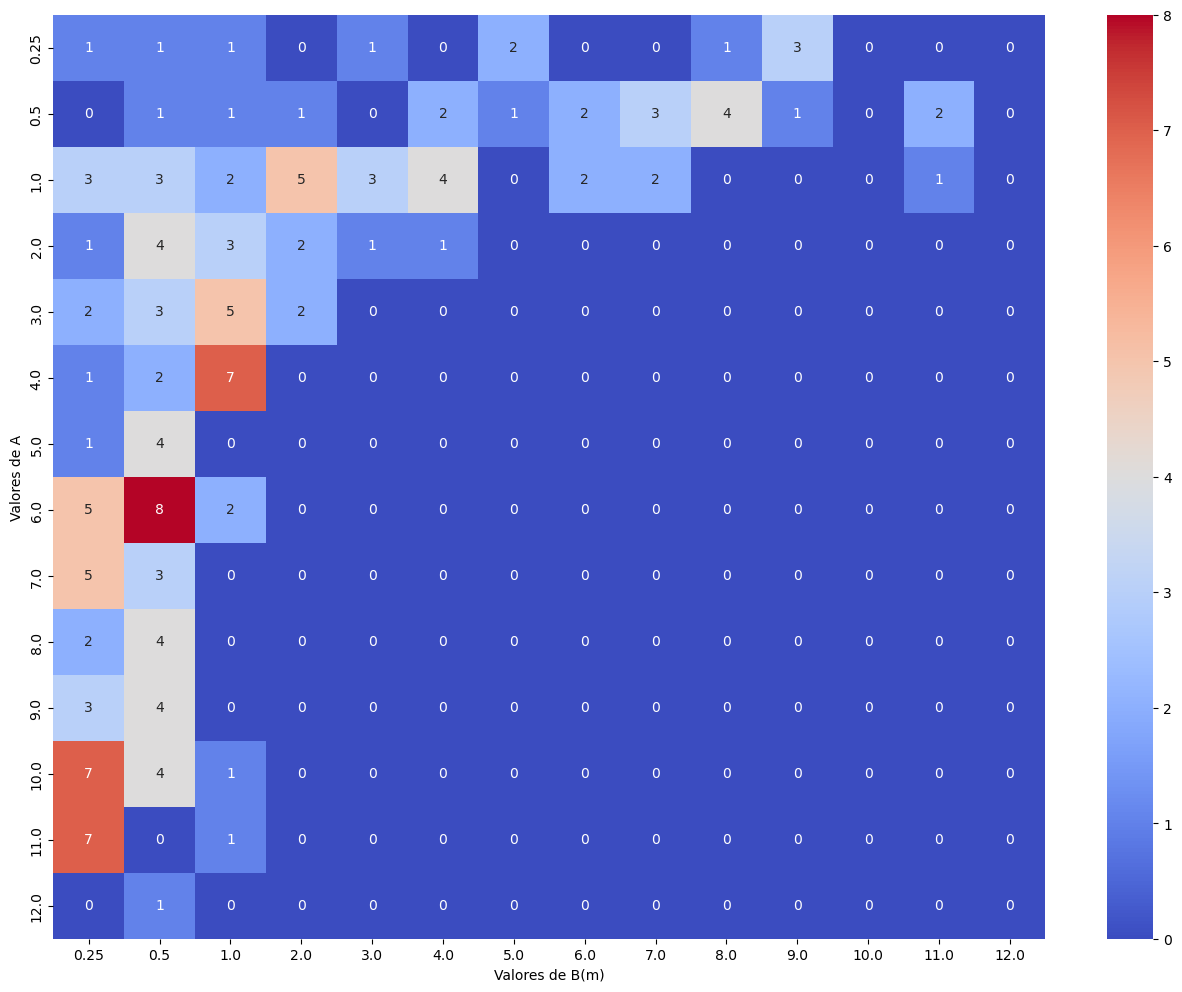

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convert keys to integers for sorting, then back to strings after sorting
sorted_trys_dict = {
    float(a_value): {float(b_value): count for b_value, count in b_dict.items()} for a_value, b_dict in trys_dict.items()
}

# Convert sorted_trys_dict to a DataFrame and fill NaNs with 0
df = pd.DataFrame(sorted_trys_dict).fillna(0).sort_index(axis=0).sort_index(axis=1)

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df, annot=True, cmap="coolwarm", cbar=True, fmt="g")
plt.xlabel("Valores de B(m)")
plt.ylabel("Valores de A")
plt.title("Heatmap de la fraccion de trys lo")
plt.show()


In [7]:
max_distance_dict = {}

for a_value, a_dict in my_dict.items():
    a_value = f'{a_value}'
    if a_value not in max_distance_dict:
        max_distance_dict[a_value] = {}
    for b_value, b_list in my_dict[a_value].items():
        b_value = f'{b_value}'
        # Initialize the b_value key in the nested dictionary if it doesn't exist
        if b_value not in max_distance_dict[a_value]:
            max_distance_dict[a_value][b_value] = 0
        mx_list = []
        for entry_dict in b_list:
            mx_list.append(abs(entry_dict[mx] - 100))
        max_distance_dict[a_value][b_value] = float(f'{np.mean(mx_list):.2f}')


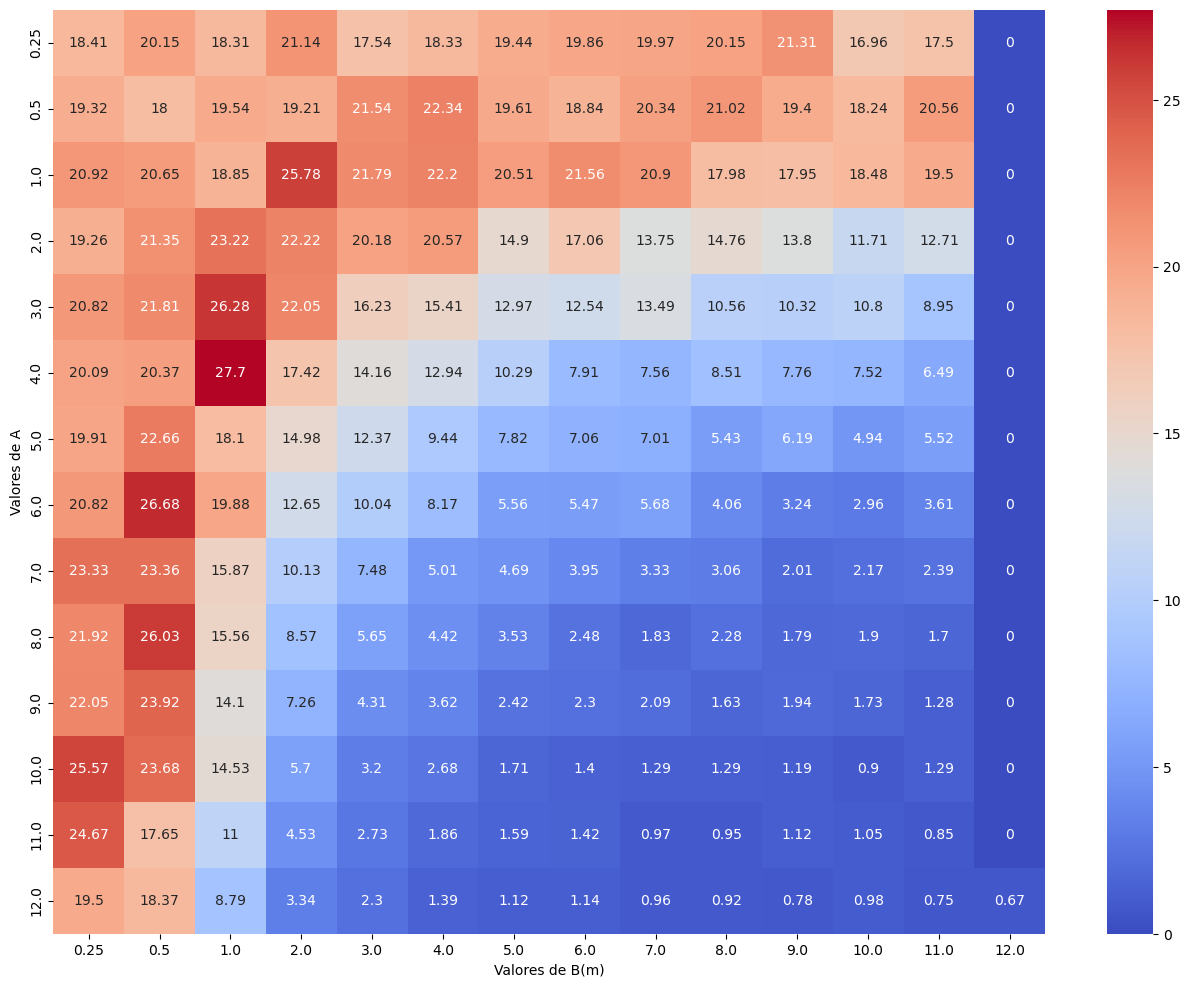

In [13]:
# Convert keys to integers for sorting, then back to strings after sorting
sorted_trys_dict = {
    float(a_value): {float(b_value): count for b_value, count in b_dict.items()} for a_value, b_dict in max_distance_dict.items()
}

# Convert sorted_trys_dict to a DataFrame and fill NaNs with 0
df = pd.DataFrame(sorted_trys_dict).fillna(0).sort_index(axis=0).sort_index(axis=1)

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df, annot=True, cmap="coolwarm", cbar=True, fmt="g")
plt.xlabel("Valores de B(m)")
plt.ylabel("Valores de A")
plt.show()

In [18]:
import os
import pandas as pd
import numpy as np
# Carpeta que contiene las subcarpetas con los outputs
OUTPUT_FOLDER = "../sorted_outputs/"

# Lista para almacenar los datos
data = []
mx = 'mx'
mr = 'mr'



# Recorre todas las carpetas en OUTPUT_FOLDER
for folder_name in os.listdir(OUTPUT_FOLDER):
    folder_path = os.path.join(OUTPUT_FOLDER, folder_name)
    
    # Solo procesa si es una carpeta con el formato esperado
    if os.path.isdir(folder_path) and folder_name.startswith("a_") and "_b_" in folder_name:
        try:
            # Extrae los valores de a y b del nombre de la carpeta
            a_value = float(folder_name.split("_")[1])
            b_value = float(folder_name.split("_")[3])
            if not ((a_value == 4 and b_value == 1) or (a_value == 6 and b_value == 0.5)):
                continue
        except (IndexError, ValueError) as e:
            print(f"Error al extraer valores de a y b de {folder_name}: {e}")
            continue
        
        
        # Recorre los archivos dentro de la carpeta específica
        for file_name in os.listdir(folder_path):
            if file_name.startswith("output_") and file_name.endswith(".csv"):
                file_path = os.path.join(folder_path, file_name)
                try:
                    # Cargar el archivo CSV (puedes ajustar los parámetros de read_csv según el formato)
                    df = pd.read_csv(file_path)
                    last_line = df.iloc[-1]
                    if last_line[mx] - last_line[mr] <= 0:
                        print(a_value, b_value, file_name)
                except Exception as e:
                    print(f"Error al procesar el archivo {file_path}: {e}")

4.0 1.0 output_43.csv
4.0 1.0 output_71.csv
4.0 1.0 output_94.csv
4.0 1.0 output_82.csv
6.0 0.5 output_4.csv
6.0 0.5 output_89.csv
